In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [7]:
#Sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex  = le.transform(data.sex)

In [8]:
#smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

In [9]:
#region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [10]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

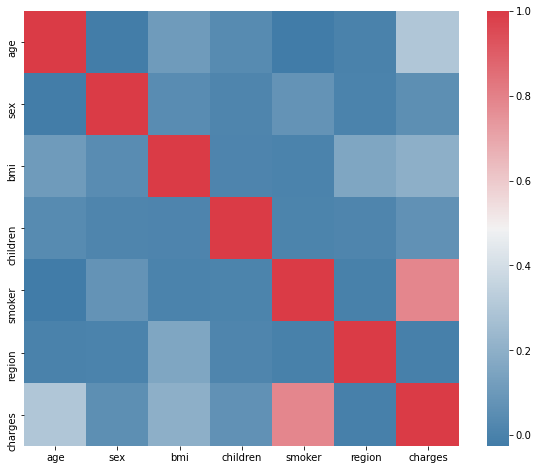

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, ax=ax)

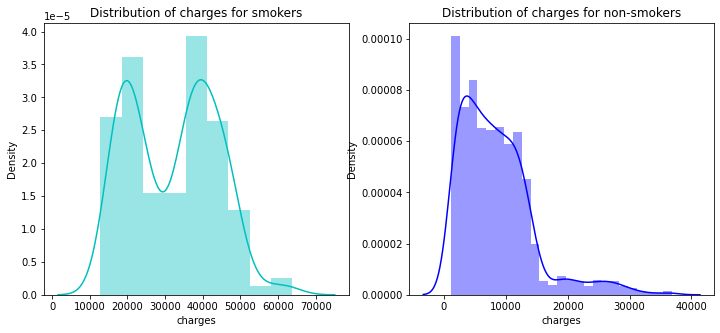

In [27]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

plt.savefig("smocking persons healthcare cost")

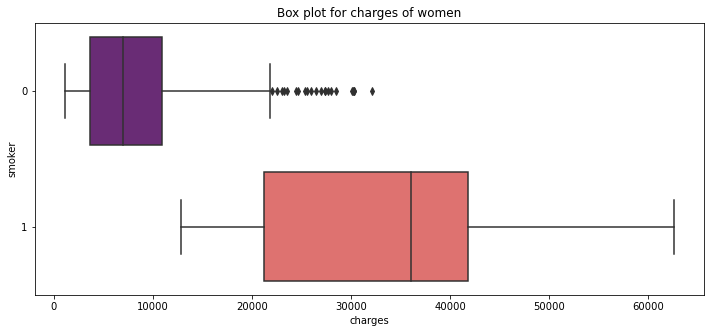

In [32]:
plt.figure(figsize=(12, 5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data=data[(data.sex == 1)], orient="h", palette='magma')
plt.savefig("ladysmocking_boxplot")

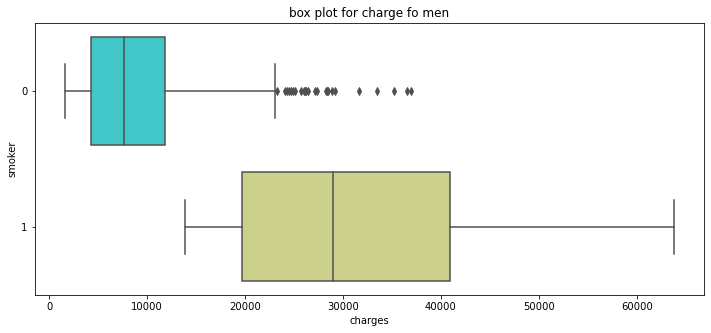

In [34]:
plt.figure(figsize=(12, 5))
plt.title("box plot for charge fo men")
sns.boxplot(y="smoker", x="charges", data=data[(data.sex== 0 )], orient="h", palette='rainbow')
plt.savefig("men who smokes hospital charges stats")